In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [3]:
X_valid = X_train_full[:5000] / 255.0
X_train = X_train_full[5000:] / 255.0
X_test = X_test / 255.0

y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [36]:
# edit from here down only

from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, kernel_regularizer=tf.keras.regularizers.l2(0.0001))
my_conv_layer = partial(tf.keras.layers.Conv2D, activation="tanh", padding="same")
lrelu = tf.keras.layers.LeakyReLU(alpha=0.1)

model = tf.keras.models.Sequential([
    my_conv_layer(128,5,padding="same",input_shape=[28,28,1]),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(256,5),
    tf.keras.layers.MaxPooling2D(2),
    my_conv_layer(512,5),
    tf.keras.layers.Flatten(),
    my_dense_layer(128),
    lrelu,
    my_dense_layer(64),
    lrelu,
    my_dense_layer(10, activation="softmax")
])

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics=["accuracy"])

In [38]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 52s 953us/step - loss: 0.5003 - acc: 0.8344 - val_loss: 0.3844 - val_acc: 0.8780
Epoch 2/10
55000/55000 [==============================] - 47s 853us/step - loss: 0.3389 - acc: 0.8916 - val_loss: 0.3156 - val_acc: 0.8986
Epoch 3/10
55000/55000 [==============================] - 47s 858us/step - loss: 0.2880 - acc: 0.9087 - val_loss: 0.3132 - val_acc: 0.9012
Epoch 4/10
55000/55000 [==============================] - 47s 861us/step - loss: 0.2543 - acc: 0.9196 - val_loss: 0.2754 - val_acc: 0.9140
Epoch 5/10
55000/55000 [==============================] - 47s 864us/step - loss: 0.2273 - acc: 0.9310 - val_loss: 0.2941 - val_acc: 0.9024
Epoch 6/10
55000/55000 [==============================] - 48s 875us/step - loss: 0.2033 - acc: 0.9389 - val_loss: 0.2729 - val_acc: 0.9162
Epoch 7/10
55000/55000 [==============================] - 48s 876us/step - loss: 0.1845 - acc: 0.9468 - val_loss: 0.2

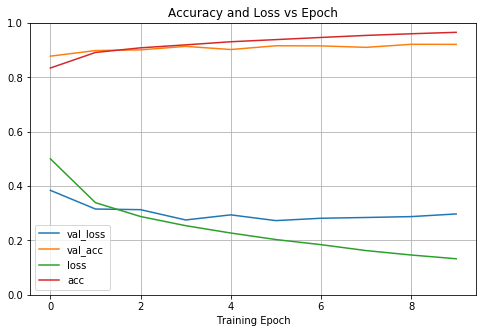

<Figure size 432x288 with 0 Axes>

In [45]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel("Training Epoch")
plt.title("Accuracy and Loss vs Epoch")
plt.show()
plt.savefig('acc-p2.png')

In [40]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 287us/step


[0.3060848204135895, 0.9193]

In [42]:
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[863   0   9  16   5   2 103   0   2   0]
 [  4 983   1   7   1   0   4   0   0   0]
 [ 13   1 875   9  37   1  64   0   0   0]
 [  9   2   6 946  16   0  20   0   1   0]
 [  2   0  59  33 851   0  55   0   0   0]
 [  0   0   0   0   0 991   0   8   0   1]
 [ 96   0  48  30  40   0 785   0   1   0]
 [  0   0   0   0   0  12   0 970   1  17]
 [  6   2   0   7   3   2  14   2 963   1]
 [  0   0   0   0   0   8   0  26   0 966]]


In [43]:
# saves conf matrix for inclusion in report
fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

df = pd.DataFrame(conf_test)
ax.table(cellText=df.values, rowLabels=np.arange(10), colLabels=np.arange(10), loc='center', cellLoc='center')
fig.tight_layout()
plt.savefig('conf_mat_p2.pdf')

ValueError: list.remove(x): x not in list

<Figure size 432x288 with 1 Axes>